In [6]:
import numpy as np
import pandas as pd

# Read the data
iris = pd.read_csv('iris.csv')
titanic = pd.read_csv('titanic.csv')
housing = pd.read_csv('housing.csv')

# Print the first 5 rows of each dataset
print('Iris\n',iris.head())
print('\nTitanic\n',titanic.head())
print('\nHousing\n',housing.head())

# print their column names
print('\nIris\n',iris.columns)
print('\nTitanic\n',titanic.columns)
print('\nHousing\n',housing.columns)


Iris
    Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

Titanic
    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0 

# Preprocessing
## print for each dataset:
| Dim Name | Data Type | Total Instances | Number of Nulls | Number of Outliers | Min value | Max value | Mode | Mean | Median | Variance | Std_dev |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |


In [7]:
# Drop unnecessary columns first
iris.drop(['Id', 'Species'], axis=1, inplace=True)
titanic.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Pclass', 'Parch', 'Sex', 'Cabin', 'Embarked', 'Survived'], axis=1, inplace=True)
housing.drop(['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus', 'parking'], axis=1, inplace=True)
def outliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    i_q_r = q3 - q1
    outliers = df[(df< (q1 - 1.5 * i_q_r)) | (df > (q3 + 1.5 * i_q_r))]
    return outliers

# iterate over the columns of each dataset and print the required information
for dataset in [iris, titanic, housing]:
    print('\nDataset:', dataset.columns[0])
    print('| Dim Name | Data Type | Total Instances | Number of Nulls | Number of Outliers | Min value | Max value | Mode | Mean | Median | Variance | Std_dev |')
    for col in dataset.columns:
        data_type = dataset[col].dtype
        total_instances = dataset[col].count()
        num_nulls = dataset[col].isnull().sum()
        # outlier is defined as a value that is more than 3 standard deviations away from the mean
        num_outliers = len(outliers(dataset[col]))
        min_val = dataset[col].min()
        max_val = dataset[col].max()
        mode_val = dataset[col].mode().values[0]
        mean_val = dataset[col].mean()
        median_val = dataset[col].median()
        var_val = dataset[col].var()
        std_val = dataset[col].std()
        print(f'| {col} | {data_type} | {total_instances} | {num_nulls} | {num_outliers} | {min_val} | {max_val} | {mode_val} | {mean_val} | {median_val} | {var_val} | {std_val} |')



Dataset: SepalLengthCm
| Dim Name | Data Type | Total Instances | Number of Nulls | Number of Outliers | Min value | Max value | Mode | Mean | Median | Variance | Std_dev |
| SepalLengthCm | float64 | 150 | 0 | 0 | 4.3 | 7.9 | 5.0 | 5.843333333333334 | 5.8 | 0.6856935123042505 | 0.8280661279778629 |
| SepalWidthCm | float64 | 150 | 0 | 4 | 2.0 | 4.4 | 3.0 | 3.0540000000000003 | 3.0 | 0.18800402684563763 | 0.4335943113621737 |
| PetalLengthCm | float64 | 150 | 0 | 0 | 1.0 | 6.9 | 1.5 | 3.758666666666666 | 4.35 | 3.1131794183445156 | 1.7644204199522617 |
| PetalWidthCm | float64 | 150 | 0 | 0 | 0.1 | 2.5 | 0.2 | 1.1986666666666668 | 1.3 | 0.5824143176733784 | 0.7631607417008414 |

Dataset: Age
| Dim Name | Data Type | Total Instances | Number of Nulls | Number of Outliers | Min value | Max value | Mode | Mean | Median | Variance | Std_dev |
| Age | float64 | 714 | 177 | 11 | 0.42 | 80.0 | 24.0 | 29.69911764705882 | 28.0 | 211.0191247463081 | 14.526497332334044 |
| SibSp | int64 | 891 | 

# Visualization
## plot for each dataset:
its histogram and boxplot, further comment on the outliers and the distribution of the data.

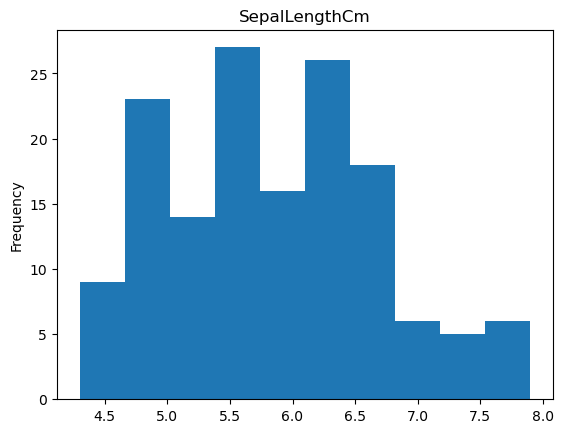

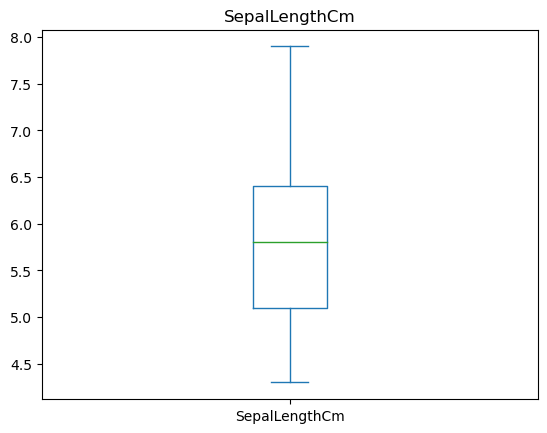

no outliers


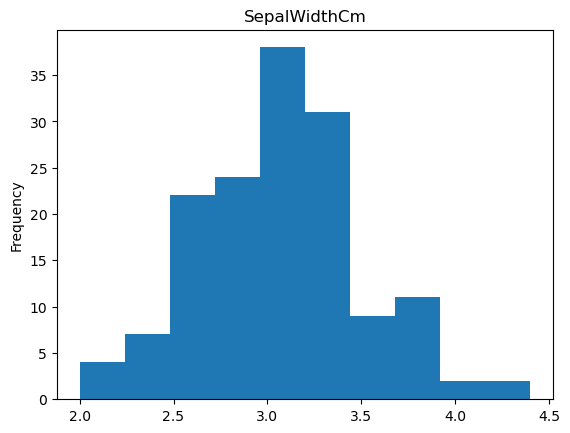

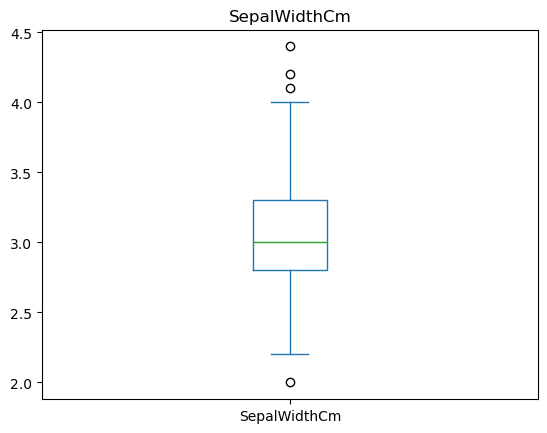

some outliers


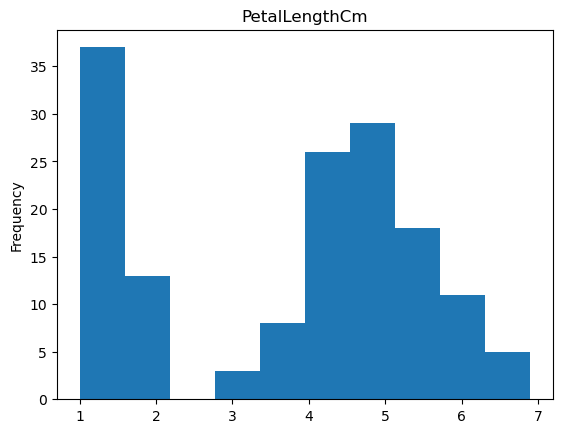

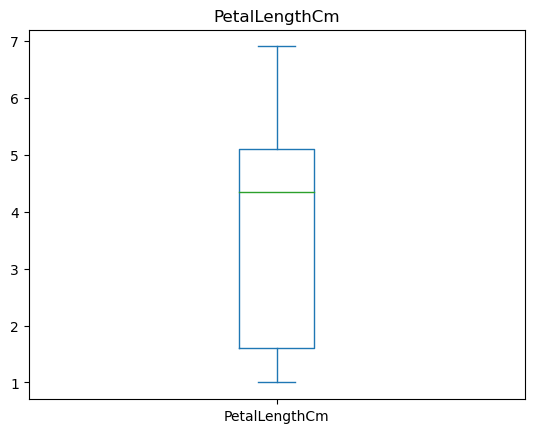

no outliers


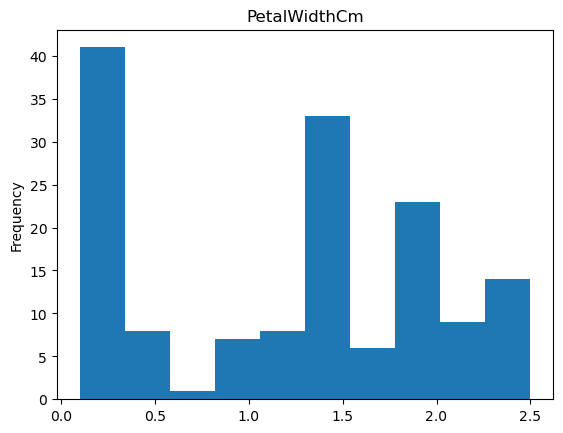

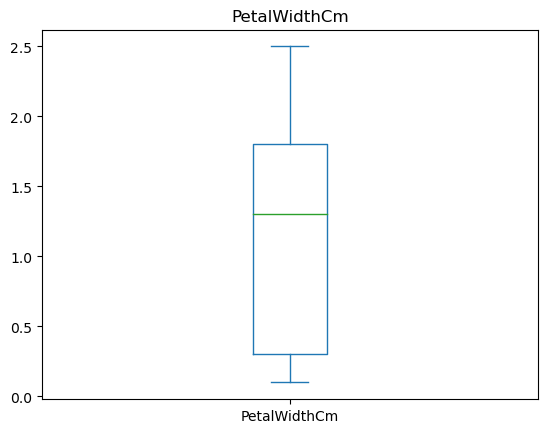

no outliers


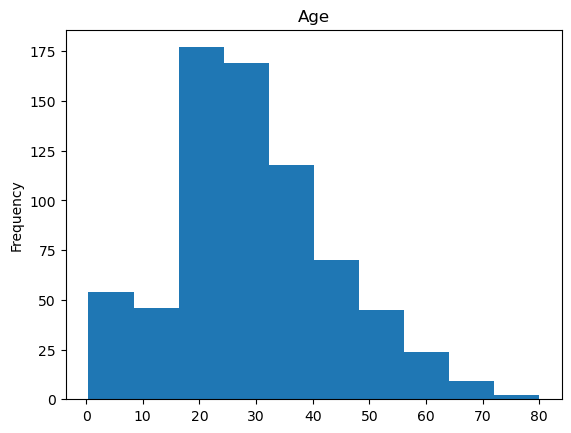

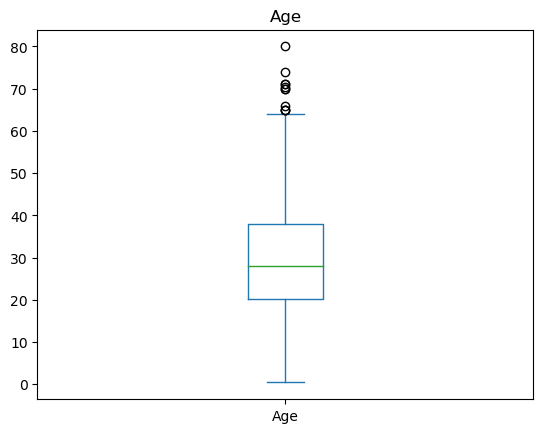

no outliers


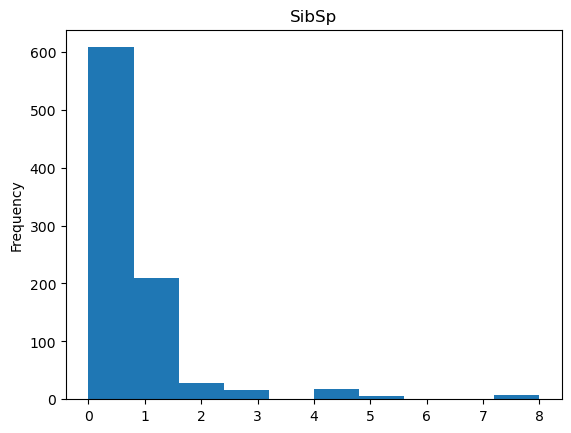

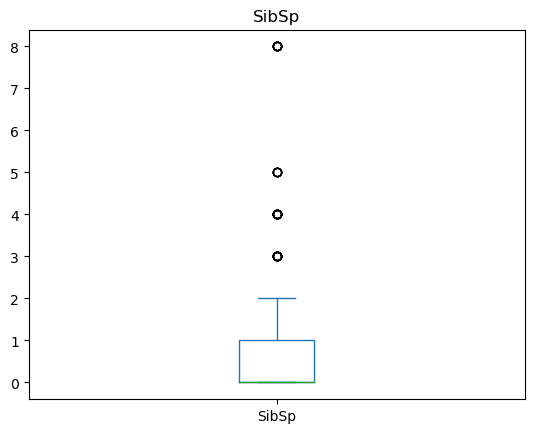

no outliers


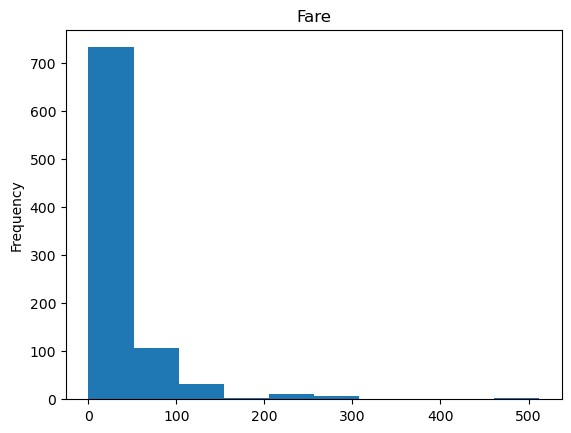

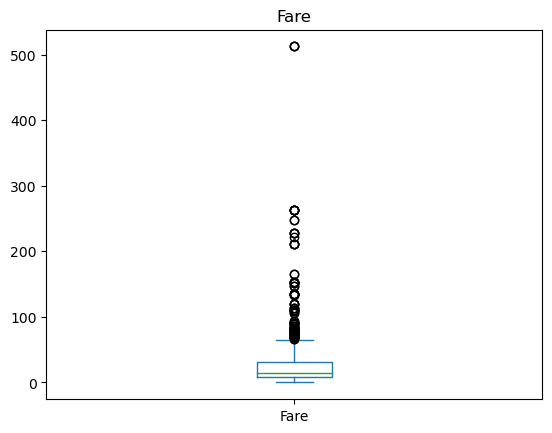

no outliers


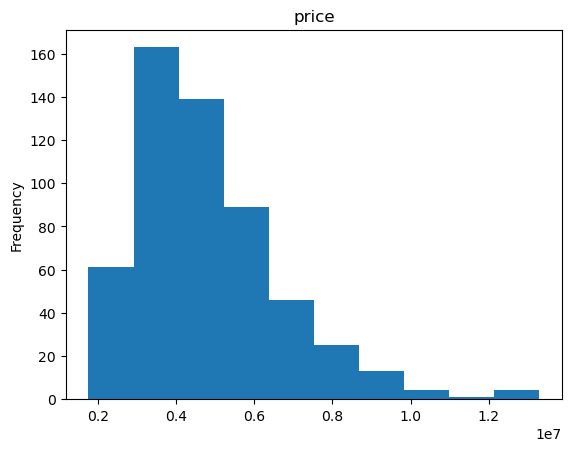

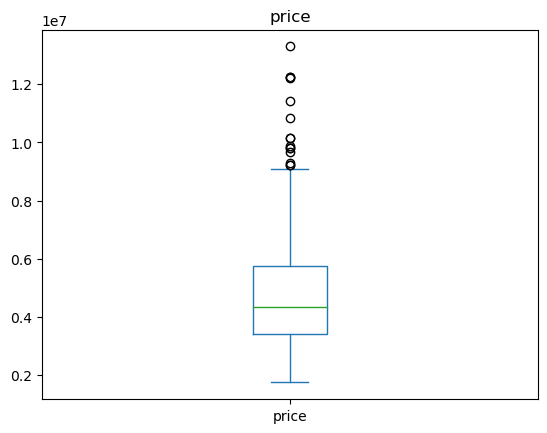

no outliers


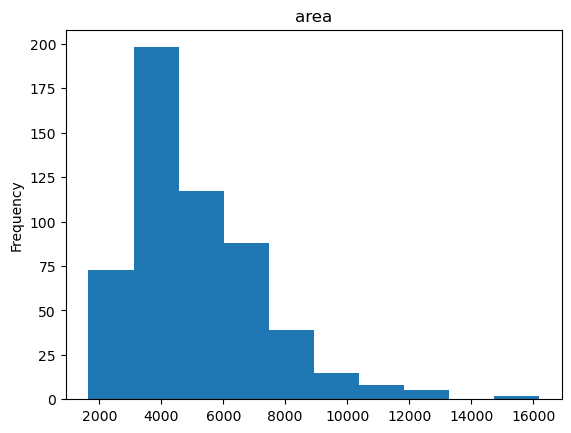

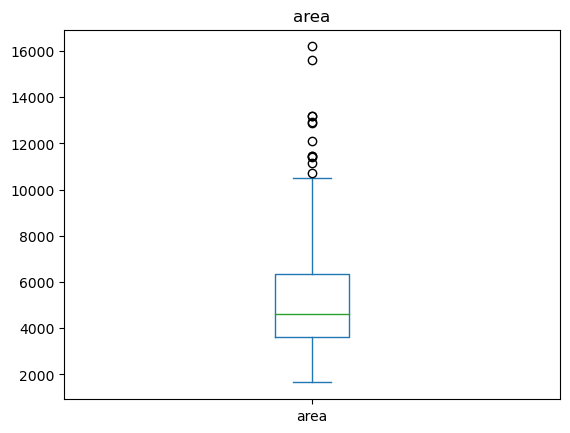

no outliers


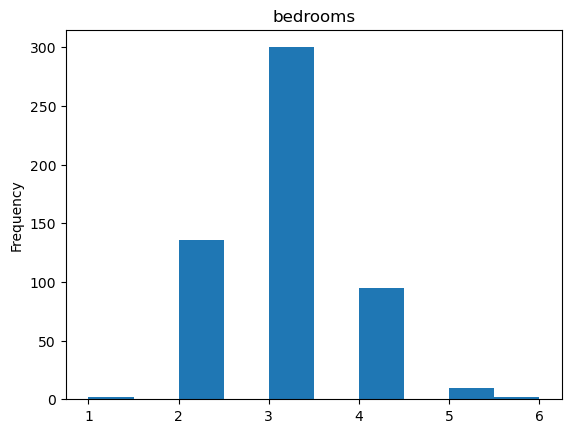

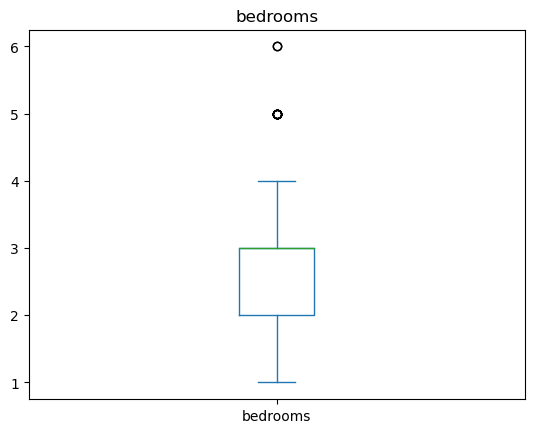

no outliers


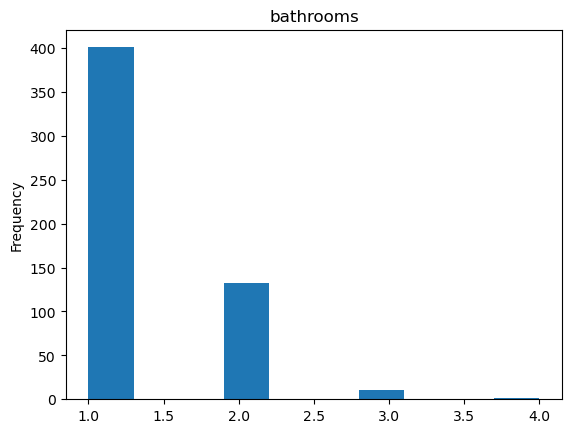

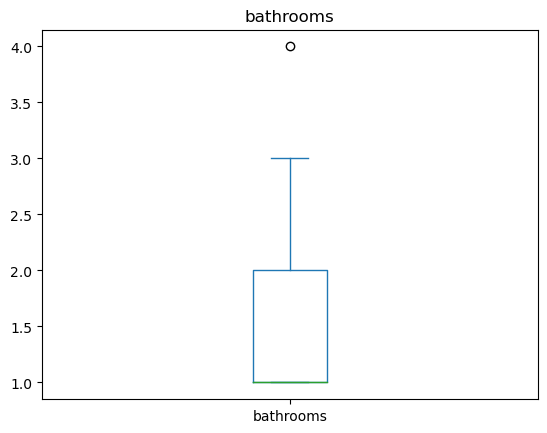

some outliers


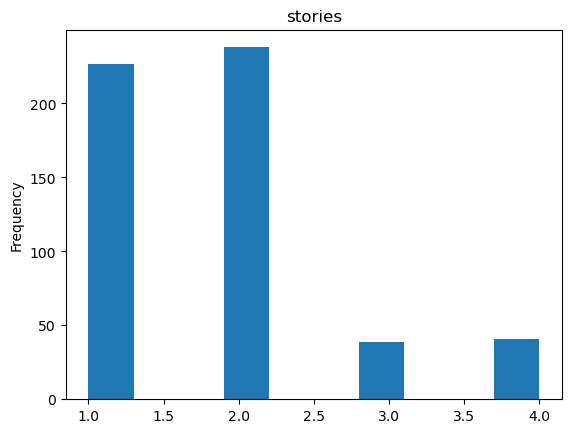

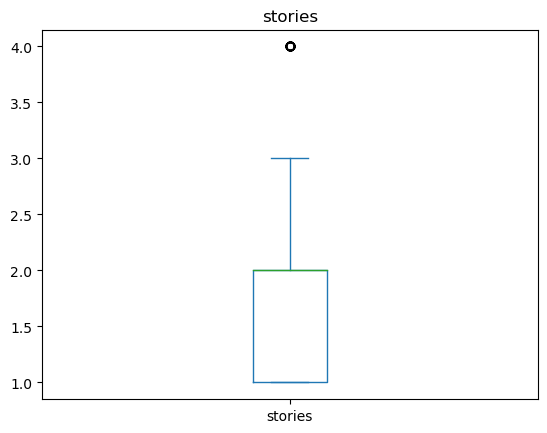

no outliers


In [8]:
import matplotlib.pyplot as plt

# iterate over the columns of each dataset and plot the required information
for dataset in [iris, titanic, housing]:
    for col in dataset.columns:
        dataset[col].plot(kind='hist', title=col)
        plt.show()
        dataset[col].plot(kind='box', title=col)
        plt.show()
        # get a categorical count of  outliers for simlicity
        num_outliers = len(outliers(dataset[col]))
        comment = 'no'
        if num_outliers > 0 and num_outliers < 5:
            comment = 'some'
        elif num_outliers == len(dataset):
            comment = 'all'
        print(f'{comment} outliers')


# Handling missing values
## print for each dataset:
filling with mean, if nulls exist

In [9]:
for dataset in [iris,titanic, housing]:
    print('Null counts for this dataset\n', dataset.isnull().sum())
    for col in dataset.columns:
        if dataset[col].isna().sum():
            print(f'{col} has null values')
            dataset[col].fillna(dataset[col].mean(), inplace=True)
    print('\nNull counts for this dataset\n', dataset.isnull().sum())

Null counts for this dataset
 SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
dtype: int64

Null counts for this dataset
 SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
dtype: int64
Null counts for this dataset
 Age      177
SibSp      0
Fare       0
dtype: int64
Age has null values

Null counts for this dataset
 Age      0
SibSp    0
Fare     0
dtype: int64
Null counts for this dataset
 price        0
area         0
bedrooms     0
bathrooms    0
stories      0
dtype: int64

Null counts for this dataset
 price        0
area         0
bedrooms     0
bathrooms    0
stories      0
dtype: int64


# Handlng outliers
## print for each dataset:
removing outliers, if outliers exist

In [10]:
# here if outliers exist we apply smoothing using the interquartile range

def removing_outliers(d):    
    Q1=d.quantile(0.25)
    Q3=d.quantile(0.75)
    IQR=Q3-Q1
    lowerlimit=Q1-1.5*IQR
    upperlimit=Q3+1.5*IQR
    return d[(d>lowerlimit)&(d<upperlimit)]

for dataset in [iris, titanic, housing]:
    for col in dataset.columns:
        # if outliers exist in less than 20% of the data, we remove them using dropna
        if len(outliers(dataset[col])) < 0.2 * len(dataset) and len(outliers(dataset[col])) > 0:
            percent = len(outliers(dataset[col])) / len(dataset)
            dataset[col] = dataset[col].dropna()
            print(f'{col} has outliers, we remove them, {percent*100:.2f} of the data was outliers')
        # otherwise we apply smoothing
        elif len(outliers(dataset[col])) > 0:
            dataset[col] = removing_outliers(dataset[col])
            print(f'{col} has outliers, we apply smoothing')
        else:
            print(f'{col} has no outliers')

SepalLengthCm has no outliers
SepalWidthCm has outliers, we remove them, 2.67 of the data was outliers
PetalLengthCm has no outliers
PetalWidthCm has no outliers
Age has outliers, we remove them, 7.41 of the data was outliers
SibSp has outliers, we remove them, 5.16 of the data was outliers
Fare has outliers, we remove them, 13.02 of the data was outliers
price has outliers, we remove them, 2.75 of the data was outliers
area has outliers, we remove them, 2.20 of the data was outliers
bedrooms has outliers, we remove them, 2.20 of the data was outliers
bathrooms has outliers, we remove them, 0.18 of the data was outliers
stories has outliers, we remove them, 7.52 of the data was outliers
